<a href="https://colab.research.google.com/github/Jairex22/Julia-sprediction-/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🧠 Training the model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.3185 - loss: 1.8473 - val_accuracy: 0.5390 - val_loss: 1.2881
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5204 - loss: 1.3469 - val_accuracy: 0.6088 - val_loss: 1.1020
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.5779 - loss: 1.2028 - val_accuracy: 0.6452 - val_loss: 1.0295
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6121 - loss: 1.0972 - val_accuracy: 0.6714 - val_loss: 0.9545
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.6364 - loss: 1.0363 - val_accuracy: 0.6610 - val_loss: 0.9558
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.6549 - loss: 0.9761 - val_accuracy: 0.6835 - val_loss: 0.9046
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.6760 - loss: 0.9218 - val_accuracy: 0.6955 - val_loss: 0.8761
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 

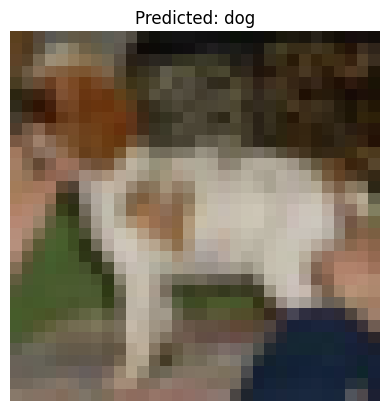

In [133]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset (60,000 32x32 color images in 10 classes)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize image data to 0–1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class names for CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("🧠 Training the model...")
model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat), batch_size=64)

# Evaluate on test set
loss, acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

# Predict sample image
import numpy as np
sample_idx = 12
sample_image = x_test[sample_idx]
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = class_names[np.argmax(prediction)]

plt.imshow(sample_image)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()